In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [44]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head(5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


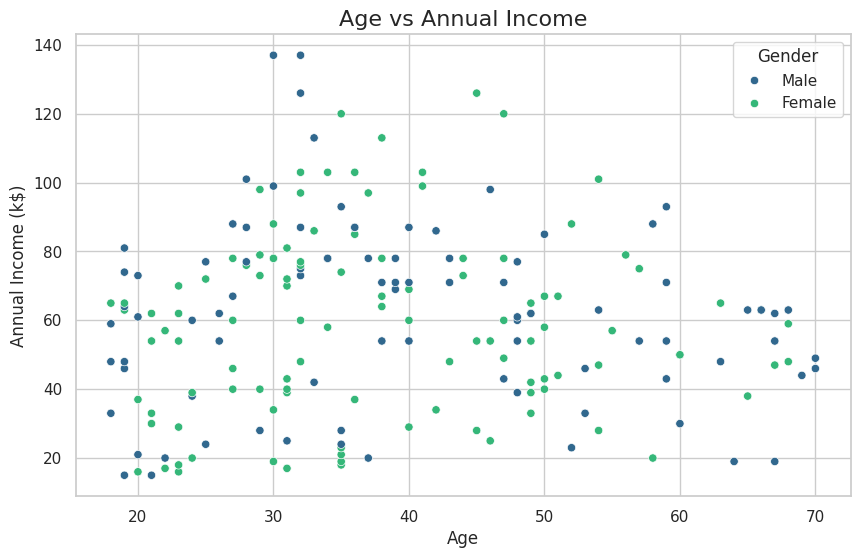

In [48]:
# make an insightful visualization and explain
sns.set(style="whitegrid")

# Create a scatter plot for Age vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='AnnualIncome', hue='Gender', palette='viridis')

# Add plot title and labels
plt.title("Age vs Annual Income", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.legend(title='Gender')

plt.show()

# Result
# The scatter plot shows that income levels are distributed across a wide age range, suggesting that income in this sample is not heavily age-dependent.
# A large concentration of customers earns between $60k and $70k annually, indicating that this is a common income range among the customer base.
# Gender distribution across income and age does not show strong differentiation, implying similar earning capacities across genders within this dataset.
# This insight highlights that income variation is more prominent within certain ranges rather than by age or gender alone.

## Data Preprocessing

For this case study, we only use income and spending score

In [49]:
# create new dataframe that consist only annual income and spending score
new_df = df[['AnnualIncome', 'SpendingScore']]
new_df.head(5)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [50]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

new_df = pd.DataFrame(sc.fit_transform(new_df), columns = ["AnnualIncome", "SpendingScore"])
new_df.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [51]:
# get stastical information on the new dataset
new_df.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

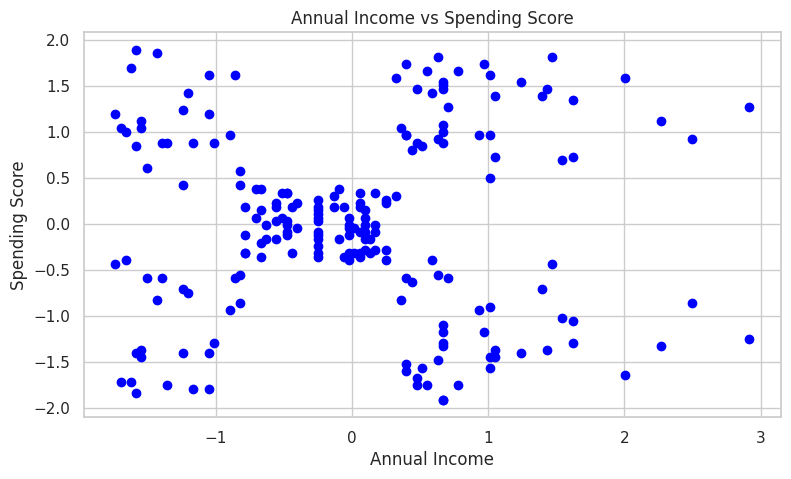

In [52]:
# Visualize the position
plt.figure(figsize=(9, 5))
plt.scatter(new_df['AnnualIncome'], new_df['SpendingScore'], c='blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

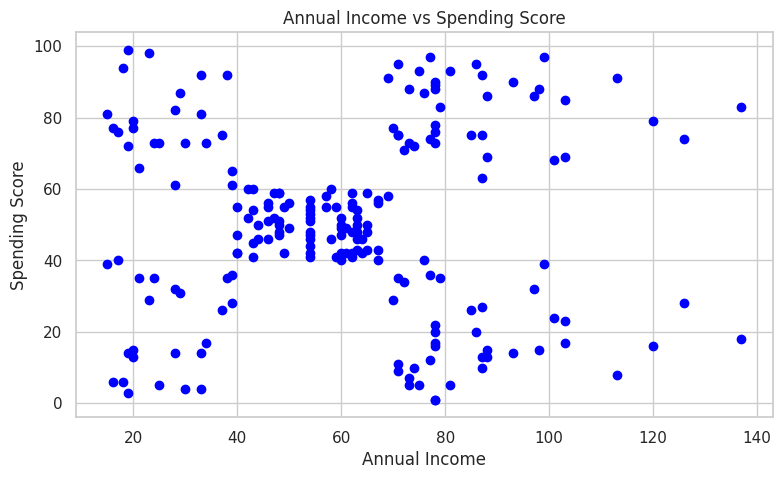

In [53]:
# Visualize the position using the original scale
plt.figure(figsize=(9, 5))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c='blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [54]:
# set the parameter for evaluating K
sse=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='random', max_iter = 300, random_state = 42)
  kmeans.fit(new_df)
  sse.append(kmeans.inertia_)

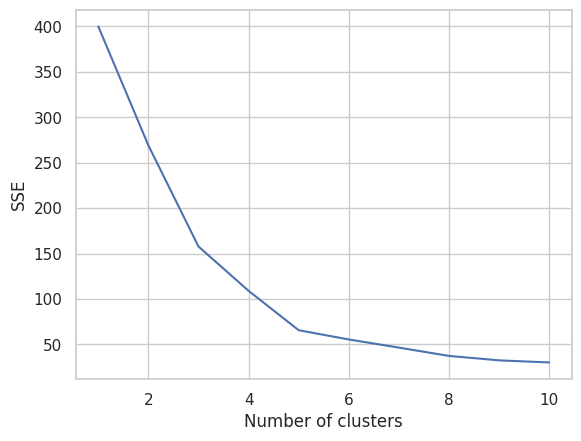

In [55]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [56]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve = "convex", direction = "decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [57]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters = 5, init='random', max_iter = 300, random_state = 42)
y_pred = kmeans.fit_predict(new_df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

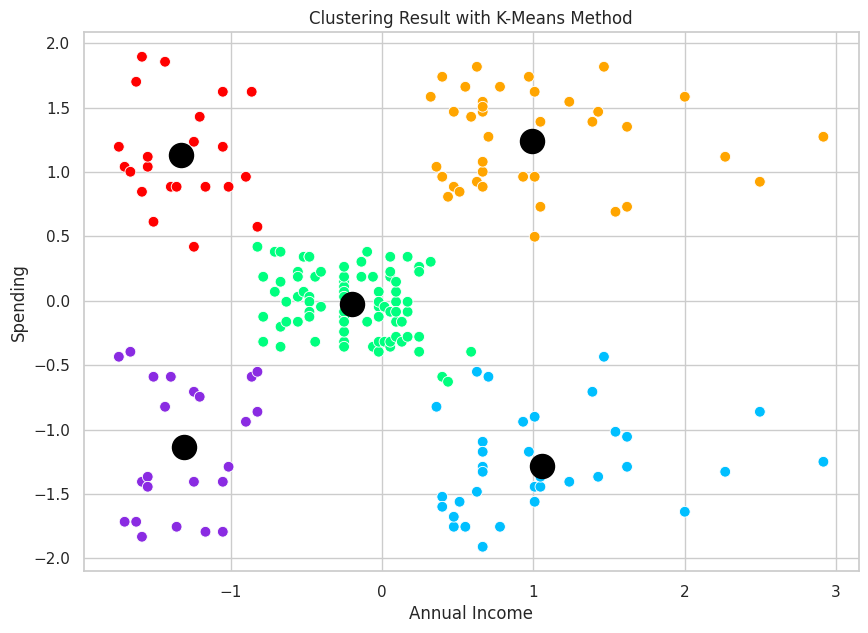

In [58]:
# visualize the result using scater chart
plt.figure(figsize = (10, 7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue = y_pred, palette = ["blueviolet", "red", "deepskyblue", "orange", "springgreen"],
                legend = None, data = new_df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "black")
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.title('Clustering Result with K-Means Method')
plt.show()

In [59]:
# Inverse transform the scaled data to get the original values
new_df = pd.DataFrame(sc.inverse_transform(new_df), columns = ["AnnualIncome", "SpendingScore"])

# Add the cluster labels to the original data
new_df['Cluster'] = y_pred

# Analyze the cluster with original values
new_df.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [60]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({ 'SpendingScore': ['mean', 'std', 'min', 'max'], 'AnnualIncome': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

# Explanation

# Cluster 0
# Conclusion: Customers in this cluster have a low average annual income (around 26.3) and a low spending score (around 20.9).
# Implication: This group likely includes customers with less money to spend or less interest in spending. Companies could attract them with affordable products and discounts.

# Cluster 1
# Conclusion: Customers in this cluster have a low average annual income (around 25.7) but a high spending score (around 79.4).
# Implication: These customers, despite a lower income, exhibit a high interest in spending. Companies could target this segment with premium yet affordable products
# and promotional offers to encourage continued spending behavior.

# Cluster 2
# Conclusion: Customers in this cluster have a high average annual income (around 88.2) but a very low spending score (around 17.1).
# Implication: This segment has high purchasing power but low spending tendencies, possibly indicating they are more conservative with expenditures.
# Companies might need to create premium or exclusive offers, focusing on value or status, to entice these customers to spend more.

# Cluster 3
# Conclusion: Customers in this cluster have both a high average annual income (around 86.5) and a high spending score (around 82.1).
# Implication: This is likely a profitable segment for businesses, as these customers have high purchasing power and a strong tendency to spend.
# Companies should consider targeting them with high-end products or exclusive services and prioritize them in loyalty programs to maintain their engagement.

# Cluster 4
# Conclusion: Customers in this cluster have a moderate average annual income (around 55.3) and a moderate spending score (around 49.5).
# Implication: This segment is likely middle-income, with balanced spending behavior. They may respond well to products that offer a good balance of quality and price.
# Companies could tailor products or services at mid-range prices to suit this segment’s preferences.

SpendingScore                    AnnualIncome                    
                 mean        std min max         mean        std min  max
cluster                                                                  
0           20.913043  13.017167   3  40    26.304348   7.893811  15   39
1           79.363636  10.504174  61  99    25.727273   7.566731  15   39
2           17.114286   9.952154   1  39    88.200000  16.399067  70  137
3           82.128205   9.364489  63  97    86.538462  16.312485  69  137
4           49.518519   6.530909  34  61    55.296296   8.988109  39   76

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>